<a href="https://colab.research.google.com/github/whatiddone/MLDL_Study/blob/main/2nd_week(Ch.6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6-1. 군집 알고리즘

- 비지도 학습: 훈련 데이터에 타깃이 없는 머신러닝(군집(클러스터링), 차원 축소 등)

## 타깃을 모르는 비지도 학습

## 과일 사진 데이터 준비하기

In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2025-02-07 13:20:10--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-02-07 13:20:10--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-02-07 13:20:11--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fruits = np.load('fruits_300.npy')

In [ ]:
print(fruits.shape)

(300, 100, 100)


In [ ]:
# 첫 번째 행 출력
print(fruits[0, 0, :])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


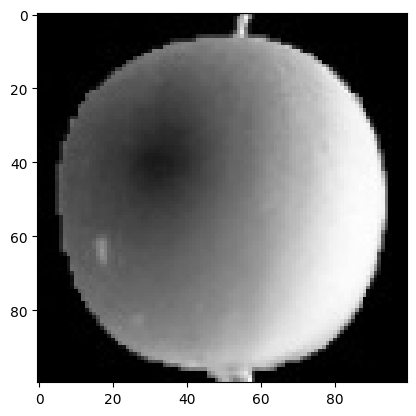

In [ ]:
# imshow() 함수를 사용하여 넘파이 배열로 저장된 이미지를 그리기
plt.imshow(fruits[0], cmap='gray')
plt.show()

- 위 이미지는 반전된 이미지이다.

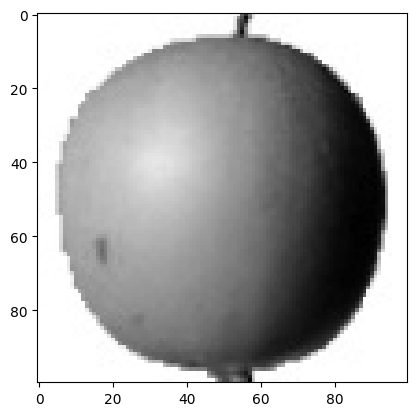

In [ ]:
# 보기 편하게 다시 반전
plt.imshow(fruits[0], cmap='gray_r')
plt.show()

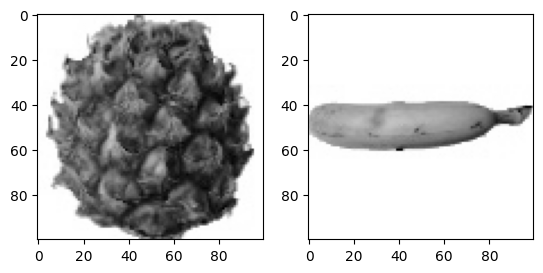

In [ ]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()

## 픽셀값 분석하기

In [ ]:
# 100*100*100 데이터를 10000*100으로 변환
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

In [ ]:
print(apple.shape)

(100, 10000)


In [ ]:
# 사과 샘플 100개에 대한 픽셀 평균값
print(apple.mean(axis=1))# 샘플의 값을 가로로 나열했으므로 axis=1

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


- axis=0: 행 방향으로 계산
- axis=1: 열 방향으로 계산

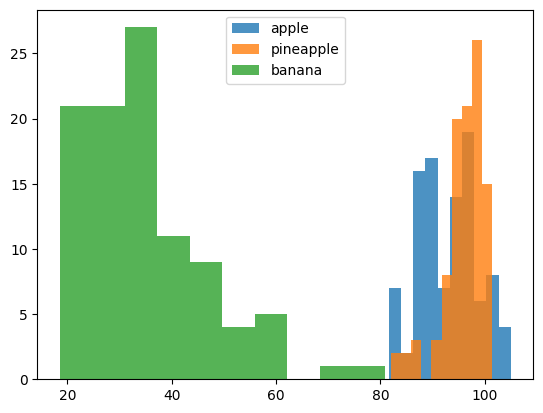

In [ ]:
# 히스토그램으로 샘플의 평균값 분포 확인
plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)
plt.legend(['apple', 'pineapple', 'banana'])
plt.show()

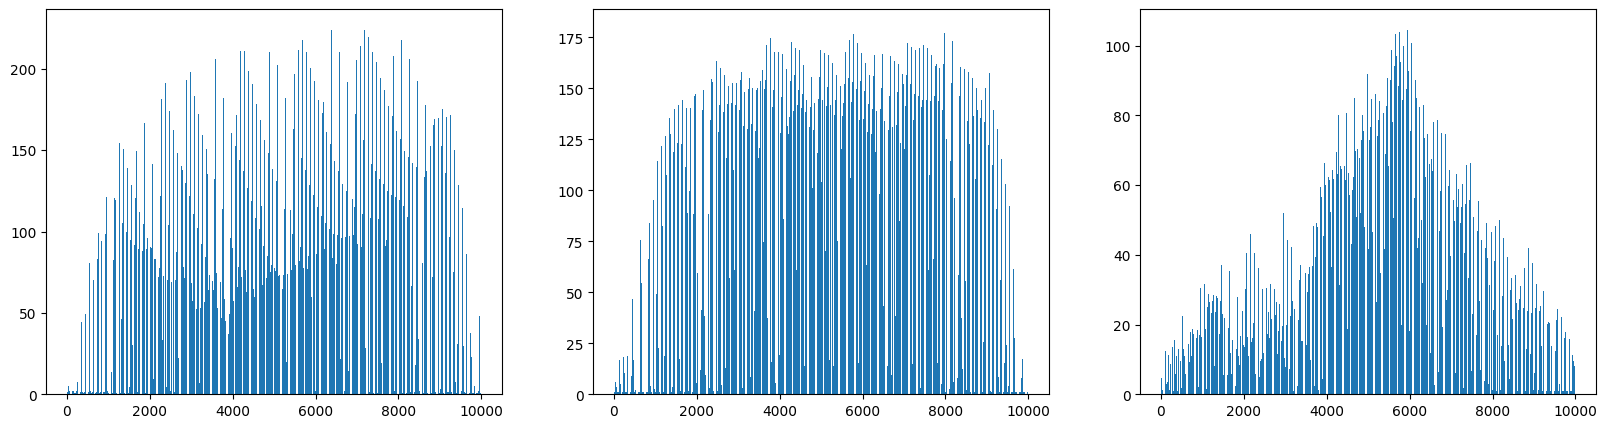

In [ ]:
# 전체 샘플에 대해 각 픽셀의 평균 계산하기
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()

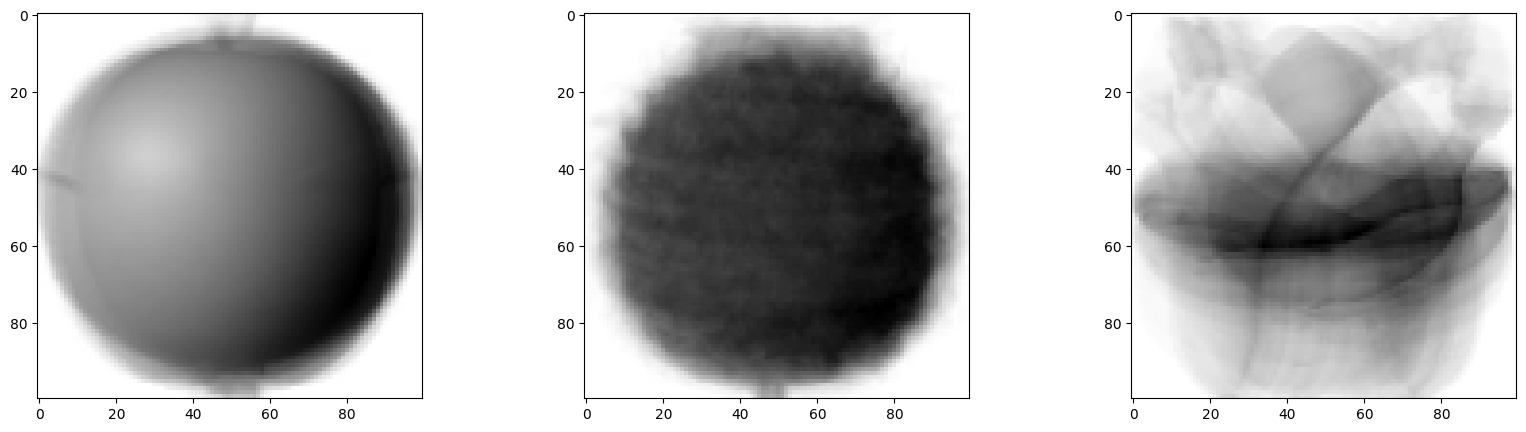

In [ ]:
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

## 평균값과 가까운 사진 고르기

In [ ]:
# 차의 평균
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)

(300,)


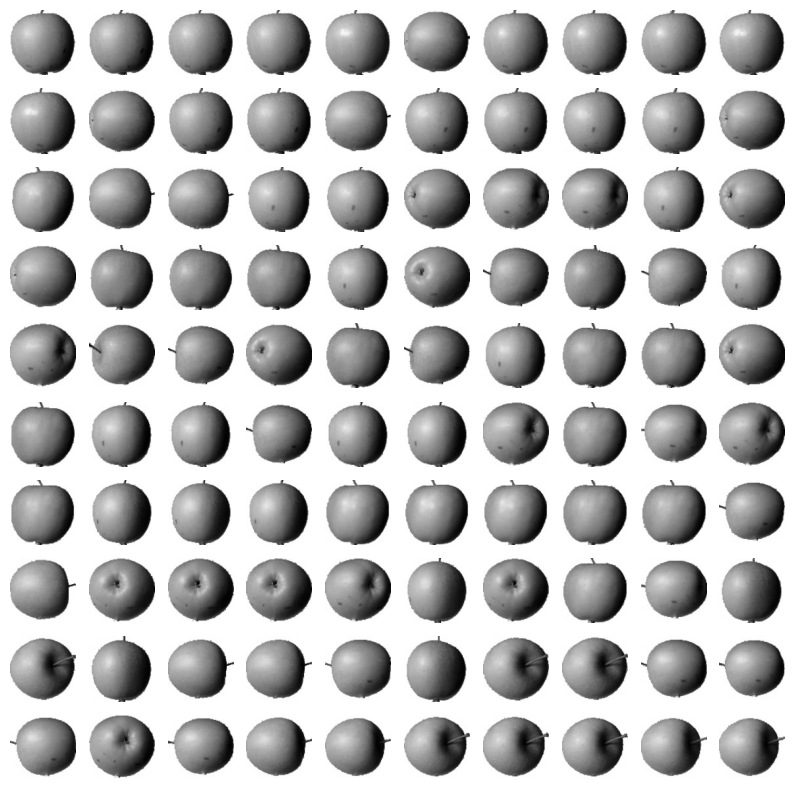

In [ ]:
# apple_mean과 오차가 가장 작은 샘플 100개 고르기
apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()

# 6-2. k-평균

k-평균 군집 알고리즘은 평균값을 자동으로 찾아준다. 평균값은 클러스터의 중심에 위치하기 때문에, 클러스터 중심 또는 센트로이드라고 불린다.

- K-평균 알고리즘: 랜덤하게 클러스터 중심을 정해가며 최적의 클러스터를 구성하는 알고리즘
- 클러스터 중심: K-평균 알고리즘이 만든 클러스터에 속한 샘플의 특성 평균값(센트로이드)
- 엘보우 방법: 클러스터 중심과 샘플 사이 거리의 제곱 합이 꺾이는 지점.

- 핵심 패키지와 함수
  - scikit-learn
    - KMeans는 k-평균 알고리즘 클래스
    - n-clusters에는 클러스터 개수를 지정. 기본값은 8
    - max-iter는 k-평균 알고리즘의 한 번 실행에서 최적의 센트로이드를 찾기 위해 반복할 수 있는 최대 횟수. 기본값은 200
    - 처음에 랜덤하게 센트로이드를 초기화하기 때문에 여러 번 반복하여 이너셔를 기준으로 가장 좋은 결과 선택. n_init는 이 반복 횟수를 지정.
    - 이너셔(Inertia)는 클러스터 내 샘플과 센트로이드 간의 거리 합을 측정하는 지표
    - 이니셔(Initializer)"는 머신러닝과 딥러닝에서 신경망 가중치(weight)와 편향(bias)을 초기화하는 방법

- 🛠️ 이니셔(Initializer) vs 이너셔(Inertia) 차이점

| 개념 | **이니셔 (Initializer)** | **이너셔 (Inertia)** |
|---|---|---|
| **뜻** | 신경망의 가중치와 편향을 초기화하는 방법 | K-means에서 클러스터 내 샘플과 센트로이드 간 거리 합(관성) |
| **사용 분야** | 딥러닝, 신경망 학습 | 머신러닝, K-means 클러스터링 |
| **주요 목적** | 학습 안정화 및 성능 향상 | 클러스터링 품질 평가 |
| **예시** | Xavier, He 초기화 | K-means 클러스터링의 inertia 값 |
| **수식** | 없음 (초기화 방법론) | \(\sum_{i=1}^{n} || x_i - c_{l(i)} ||^2\) |
| **Python 예시** | `GlorotUniform()`, `HeNormal()` | `kmeans.inertia_` |

- ✅ 결론
- **이니셔(Initializer)** → 신경망 학습을 위해 가중치를 초기화하는 방법  
- **이너셔(Inertia)** → K-means에서 클러스터의 품질을 평가하는 지표  
- 둘 다 머신러닝에서 사용되지만, **완전히 다른 개념**!


## KMeans 클래스

In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2025-02-08 02:51:40--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-02-08 02:51:40--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-02-08 02:51:41--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... conne

In [ ]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42) # 클러스터 개수 3개
km.fit(fruits_2d)

KMeans(n_clusters=3, random_state=42)

In [ ]:
print(km.labels_)

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [ ]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([112,  98,  90]))


In [ ]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수
    # 한 줄(가로)로 10개씩 이미지를 그리고. 샘플 개수를 10으로 나누어 전체 행 개수를 계산
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수. 그렇지 않으면 10개
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 번째 행까지만 그리기
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

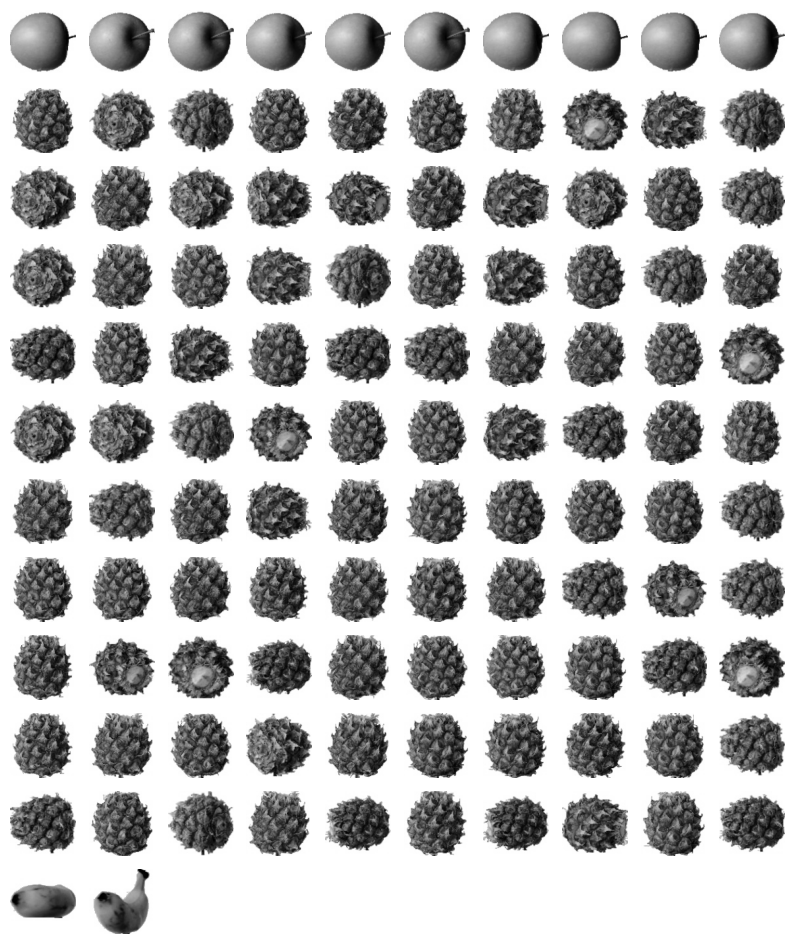

In [ ]:
# 레이블이 0인 과일 사진 모두 그리기
draw_fruits(fruits[km.labels_==0]) # km.labels_배열에서 값이 0인 위치는 True, 그 외는 모두 False, 불리언 인덱싱을 적용하면 True인 위치의 원소만 모두 추출

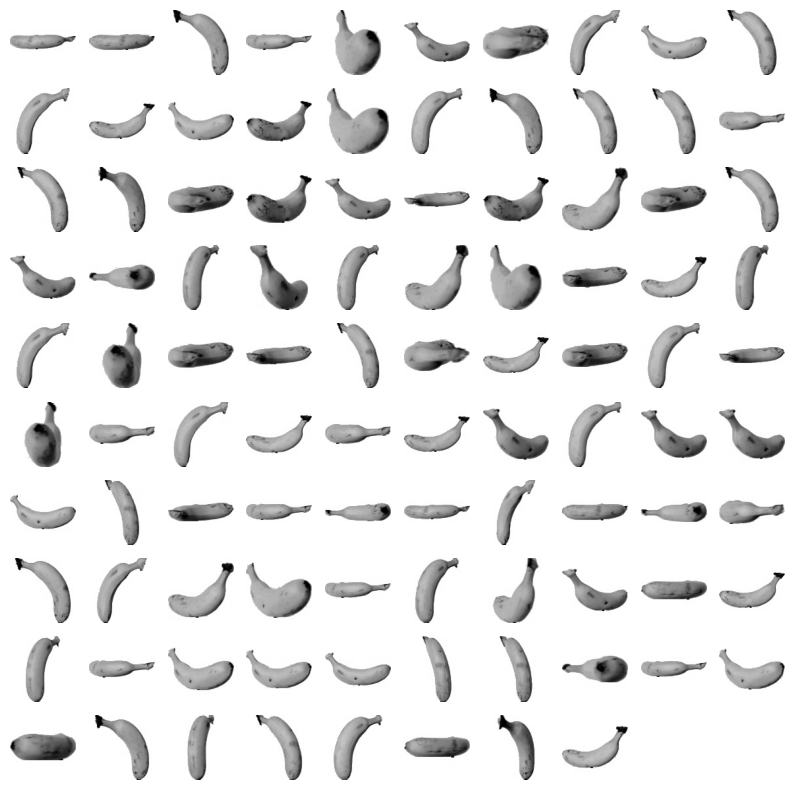

In [ ]:
draw_fruits(fruits[km.labels_==1])

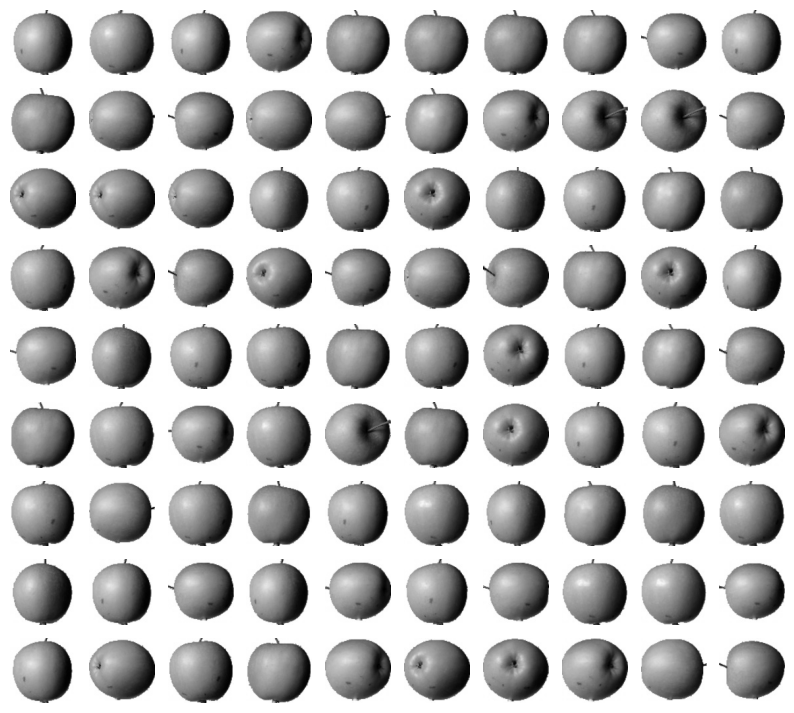

In [ ]:
draw_fruits(fruits[km.labels_==2])

## 클러스터 중심

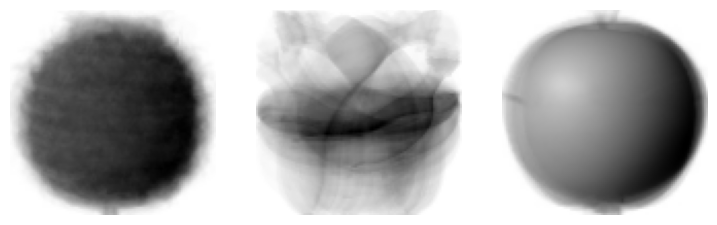

In [ ]:
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

In [ ]:
print(km.transform(fruits_2d[100:101]))

[[3400.24197319 8837.37750892 5279.33763699]]


In [ ]:
print(km.predict(fruits_2d[100:101]))

[0]


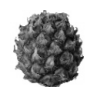

In [ ]:
draw_fruits(fruits[100:101])

In [ ]:
print(km.n_iter_)

4


## 최적의 k 찾기

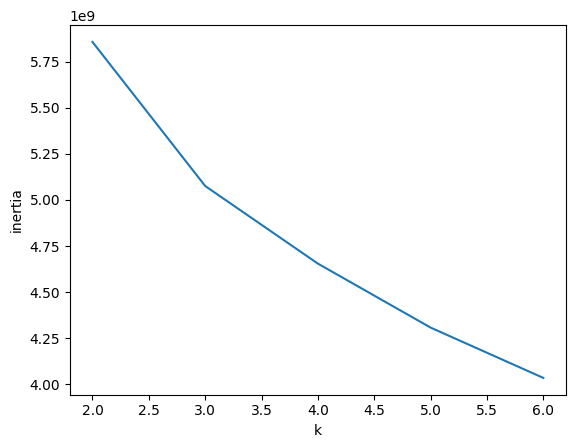

In [ ]:
inertia = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, n_init='auto', random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)

plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

# 6-3. 주성분 분석

- 차원 축소: 원본 데이터의 특성을 새로운 특성으로 변환하는 비지도 학습의 한 종류
- 주성분 분석(PCA): 데이터에서 가장 분산이 큰 방향(주성분)을 찾는 방법. 일반적으로 주성분은 원본 특성의 개수만큼 찾을 수 있다.
- 설명된 분산: 주성분 분석에서 주성분이 얼마나 원본 데이터의 분산을 잘 나타내는지 기록한 것

- 주성분 벡터란?
  - PCA의 핵심 개념은 원본 데이터의 변동성을 가장 잘 설명하는 축(즉, 주성분)을 찾는 것입니다. 이를 위해 공분산 행렬을 분해하여 고유벡터(eigenvectors) 와 고유값(eigenvalues) 를 계산하는데, 이 고유벡터들이 바로 주성분 벡터(principal component vectors) 입니다.

  - 각 주성분 벡터는 원래 데이터의 차원 수와 같은 크기를 가지며, 이 벡터가 원본 데이터 공간에서 새로운 축을 정의합니다.

  - 고유벡터(Eigenvectors): 데이터의 주된 방향(주성분 방향): 벡터값으로 설
  - 고유값(Eigenvalues): 각 주성분이 설명하는 데이터의 변동성(분산) 크기.

- 핵심 패키지와 함수
  - scikit-learn
    - PCA는 주성분 분석을 수행하는 클래스
    - n_components는 주성분의 개수를 지정한다. 기본값은 None으로 샘플 개수와 특성 개수 중에 작은 것의 값을 사용한다.
    - random_state에는 넘파이 난수 시드 값을 지정할 수 있다.
    - components_ 속성에는 훈련 세트에서 찾은 주성분이 저장된다.
    - explained_variance_ 속성에는 설명된 분산이 저장되고, explained_variance_ratio_에는 설명된 분산의 비율이 저장된다.
    - inverse_transform() 메서드는 transform() 메서드로 차원을 축소시킨 데이터를 다시 원본 차원을 복원

## PCA 클래스

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

--2025-02-11 04:24:03--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-02-11 04:24:03--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-02-11 04:24:04--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [2]:
# PCA 학습
from sklearn.decomposition import PCA

pca = PCA(n_components=50) # n_components 매개변수에 주성분의 개수 지정
pca.fit(fruits_2d) # 비지도 학습이기 때문에 fit() 메서드에 타깃값 제공 X.

PCA(n_components=50)

In [3]:
print(pca.components_.shape) # 50개의 주성분을 찾았으므로 첫 번째 차원은 50, 원본 데이터의 특성 개수가 10000개이므로 두 번째 차원은 100000

(50, 10000)


In [4]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수
    # 한 줄(가로)로 10개씩 이미지를 그리고. 샘플 개수를 10으로 나누어 전체 행 개수를 계산
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수. 그렇지 않으면 10개
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 번째 행까지만 그리기
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

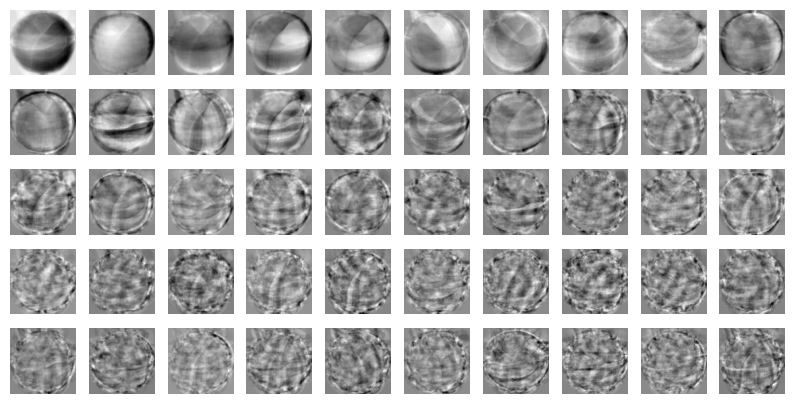

In [5]:
# 주성분을 100*100 크기의 이미지처럼 출력
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [6]:
print(fruits_2d.shape)

(300, 10000)


In [7]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


50개의 주성분을 찾은 PCA 모델을 사용해 이를 (300,50) 크기의 배열로 변환(크기 1/200배 감소)

## 원본 데이터 재구성

In [8]:
# inverse_transform() 메서드를 활용하여 원본 데이터 재구성
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


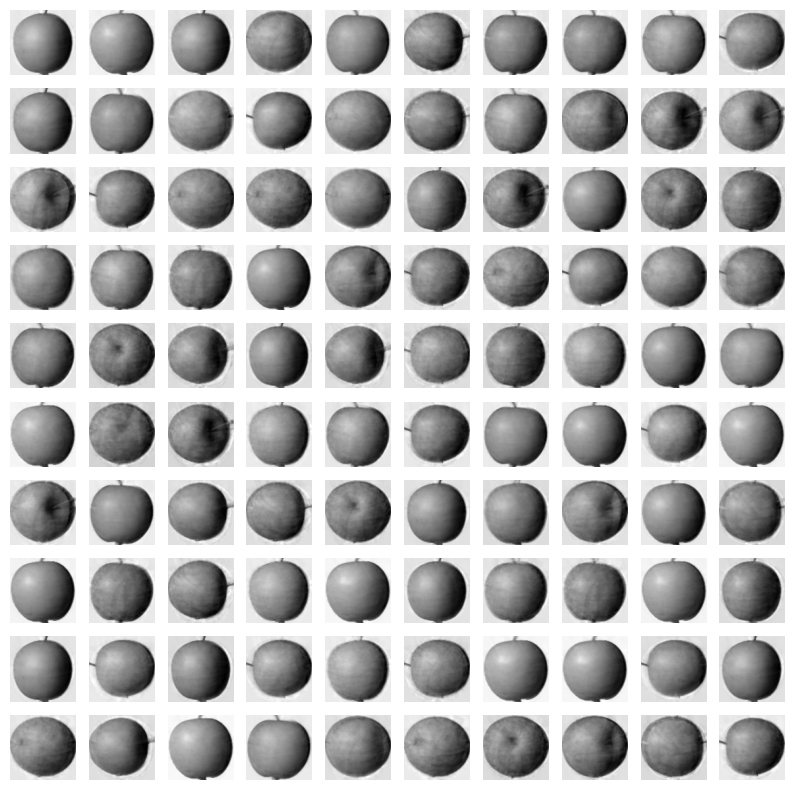

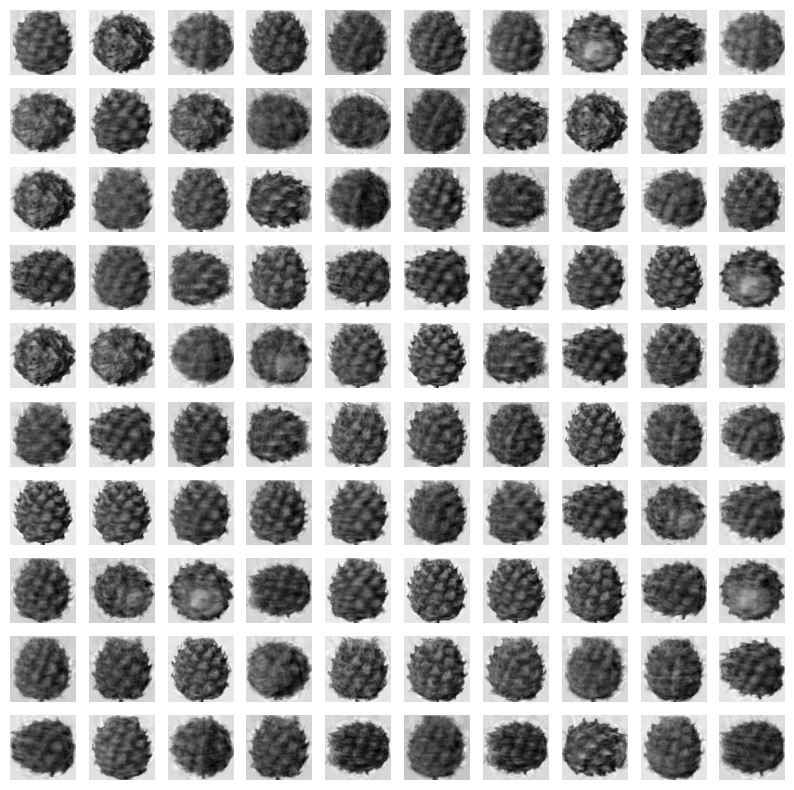

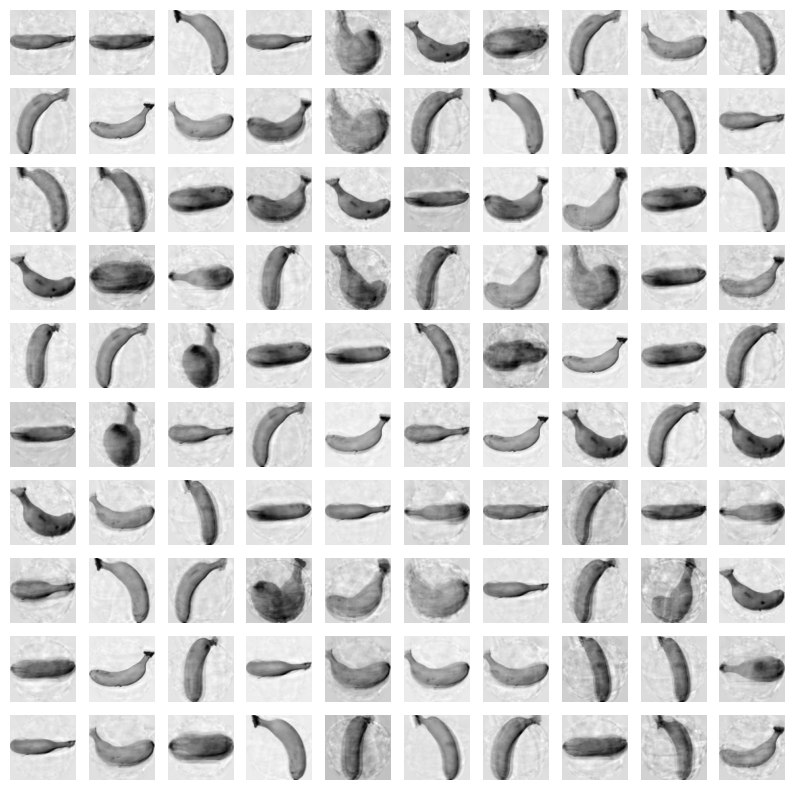

In [9]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

## 설명된 분산
- 설명된 분산: 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값

In [10]:
# 분산 비율을 모두 더해서 총 분산 비율을 얻기
print(np.sum(pca.explained_variance_ratio_))

0.9215565112491504


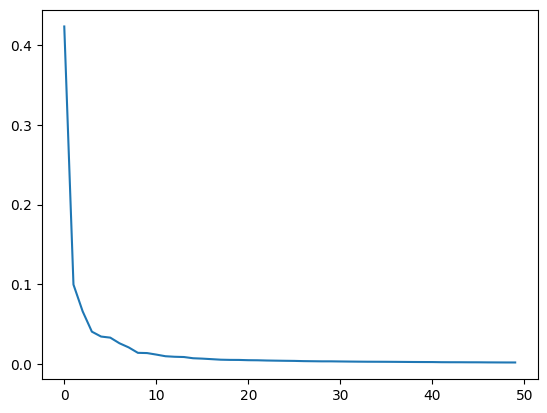

In [11]:
# 설명된 분산을 그래프로 출력하기
plt.plot(pca.explained_variance_ratio_)
plt.show()

✔ PCA는 가장 변동성이 큰 방향을 먼저 찾고, 변동성이 작은 방향을 뒤로 보냄.   
✔ 앞쪽 주성분(PC1, PC2)이 분산이 높은 것은 PCA의 기본 원리 때문이며, 이는 자연스러운 현상임.   
✔ 뒤쪽 주성분일수록 설명하는 분산이 작아지고, 결국 노이즈가 될 가능성이 큼.   
✔ 차원 축소를 원한다면, 설명된 분산 비율을 보고 의미 없는 주성분을 제거하면 됨.

## 다른 알고리즘과 함께 사용하기

In [19]:
# 로지스틱 모델과 함께 사용 로지스틱 모델과 함께 사용
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [20]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [21]:
from sklearn.model_selection import cross_validate

# 원본 데이터
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.9544431209564209


In [22]:
# PCA로 축소한 데이터
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.011057901382446288


- 성능 비슷하나 시간차이는 90배 정도

In [24]:
# 설명된 분산의 50%에 달하는 주성분 찾기
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [27]:
print(pca.n_components_)

2


In [28]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [31]:
# 2개의 특성을 사용하여 교차 검증하기
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.022351455688476563


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [33]:
# K-평균 알고리즘으로 클러스터 찾기
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


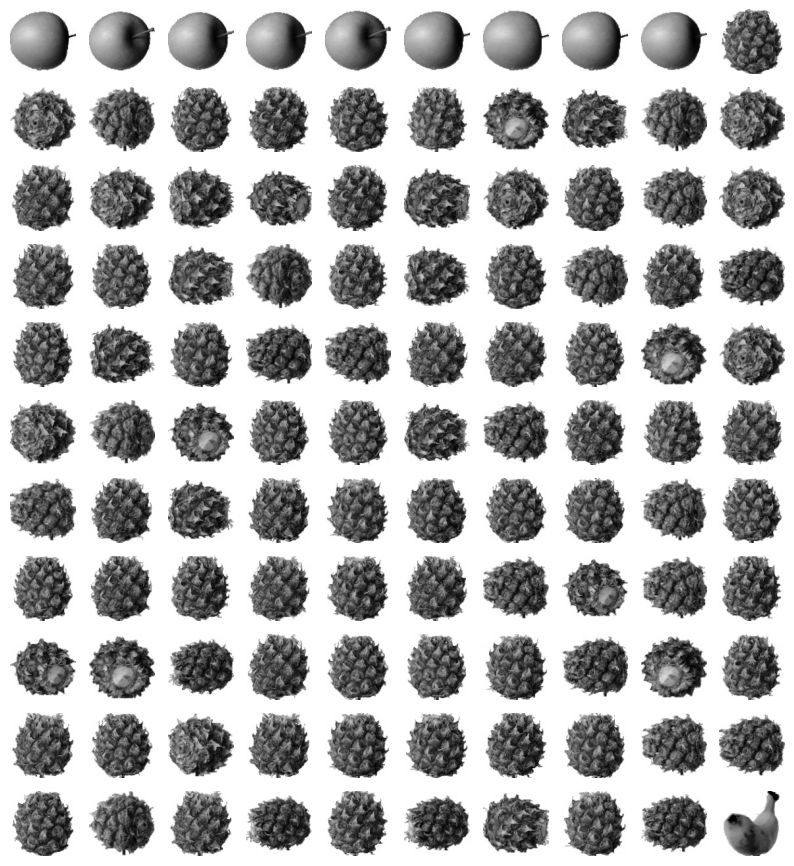

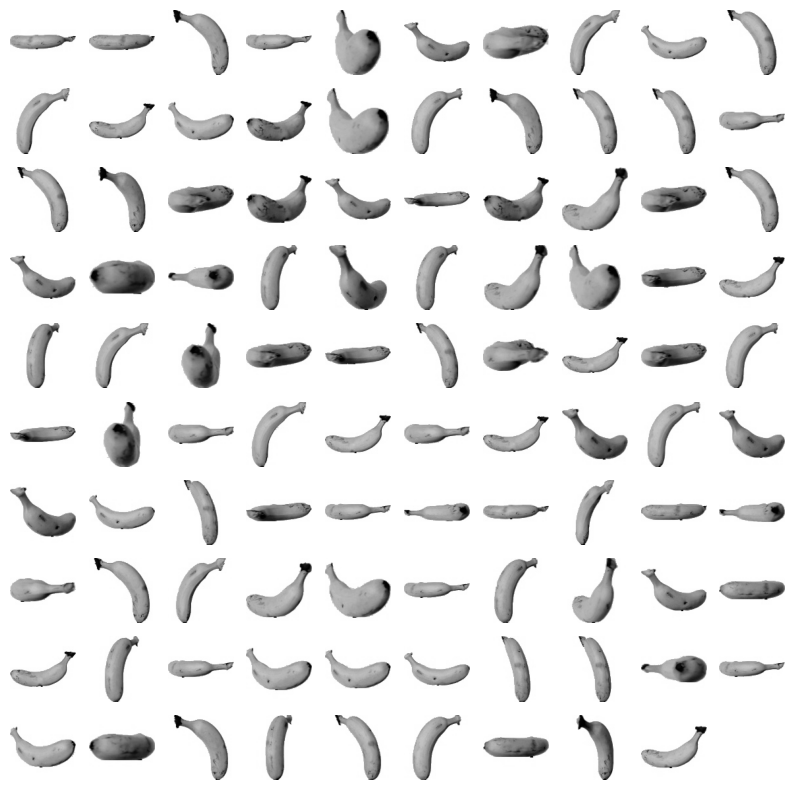

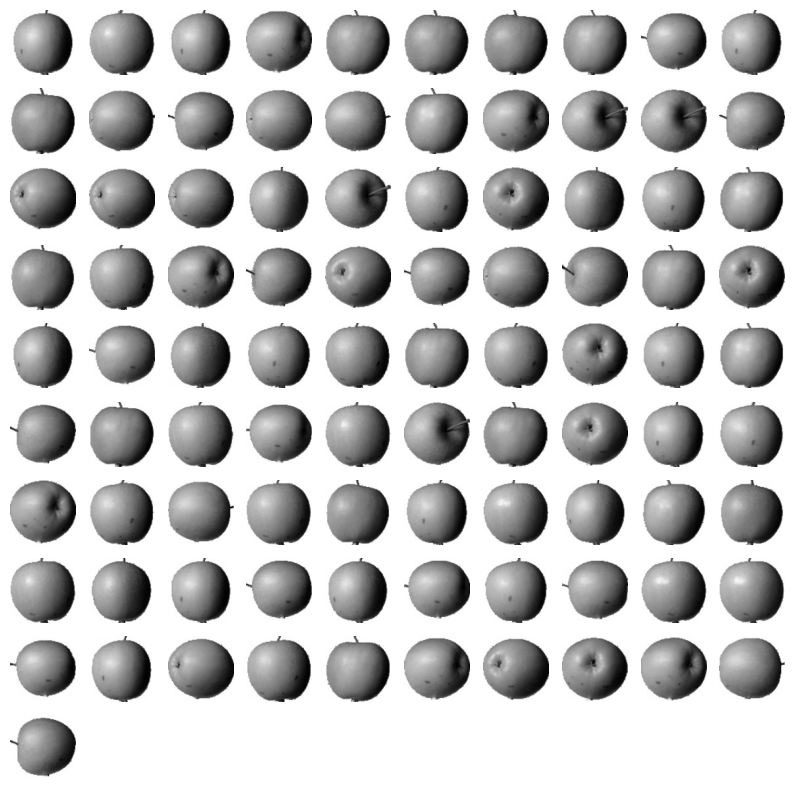

In [34]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

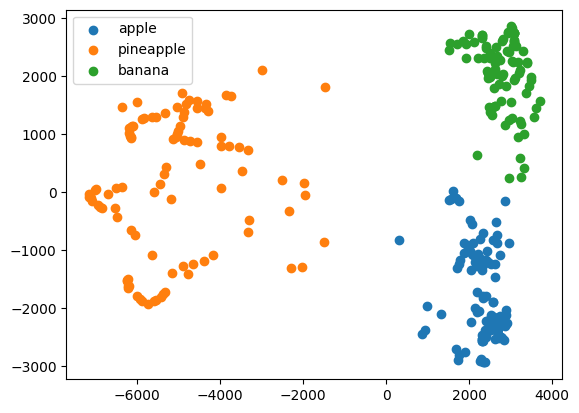

In [36]:
# 시각화
for label in range(0,3):
  data = fruits_pca[km.labels_==label] # km_labels를 사용해 클러스터별로 나누기
  plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'pineapple', 'banana'])
plt.show()